In [1]:
import mesa
import math
import numpy as np
import matplotlib.pyplot as plt

from Model_Ilya_Play_Area import *

### Trying new features of the model

#### Simulate single population

In [ ]:
#Making x steps with in the model
x = 300

model = Microbiome(0,10, False, 10, 10, immediate_killing = False)
for i in range(x):
    model.step()

# Check the numbers of agents

agent_num_data = model.datacollector.get_model_vars_dataframe()
num_of_agents = agent_num_data.loc[:,"Type_a_2"]
number_of_time_steps = agent_num_data.index

# Plotting the number of agents over time
plt.plot(number_of_time_steps, num_of_agents)

# Adding labels and title
plt.xlabel('Time Step')
plt.ylabel('Number of Agents')
plt.title('Number of Agents Over Time')

# Displaying the plot
plt.show()

In [10]:
# interseting trend that increase in max colony radius does not necesarrily increase the simulation runtime
# TO DO:
# DONE 1. Check the variables of the bacteria for artefacts, single type 
# DONE 2. Run the simulation in the browser, single type
# DONE 3. Compare spread with one starting bacteria with and without the recursive function, both starting points somewhere in the middle, 50 x 50 grid
### Recursive: 313 steps, non recursive: ~ 1k steps
# DONE 4. Adapt Type 1 accordingly
# DONE 5. Run the simulation in the browser, both types
### Issue (solved): Predator expands randomly in two microcolonies of Prey 

### Issue: The max number of bacteria per simulation coordinate is exceeded in some cases
### Issue: Smulation is too slow once the entire grid is full
### Idea: introduce a feature that modifies microcolony growth when the max cell count is reached
# DONE 6. Review secretion of antibiotica and the stress reaction
# 7. Do final artifact checking


#### Simulate both populations

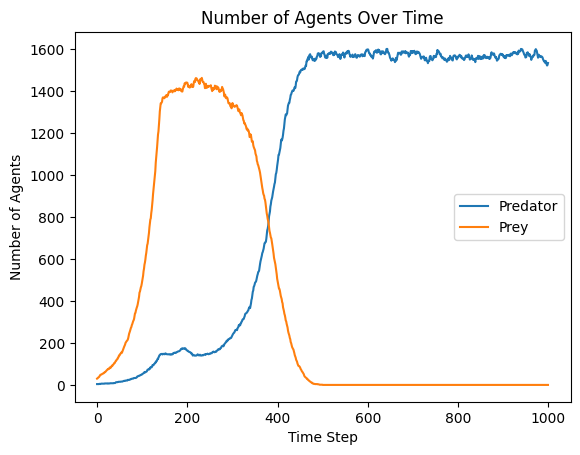

In [2]:
#Making x steps with in the model
x = 1000

model = Microbiome(4, 30, False, 25, 25, immediate_killing = False)
for i in range(x):
    model.step()

# Check the numbers of agents

agent_num_data = model.datacollector.get_model_vars_dataframe()
num_of_agents_1 = agent_num_data.loc[:,"Type_a_1"]
num_of_agents_2 = agent_num_data.loc[:,"Type_a_2"]
number_of_time_steps = agent_num_data.index

# Plotting the number of agents over time
plt.plot(number_of_time_steps, num_of_agents_1, label = "Predator")
plt.plot(number_of_time_steps, num_of_agents_2, label = "Prey")

# Adding labels and title
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Number of Agents')
plt.title('Number of Agents Over Time')

# Displaying the plot
plt.show()

In [7]:
s_mutens_radius = 0.75 # micrometers
average_bacteria_area = 4*math.pi*s_mutens_radius**2 
average_bacteria_area

7.0685834705770345

In [9]:
# Extract the data about mass of one of the bacteria
my_variable_view = []

my_agents = [agent for agent in model.schedule.agents if isinstance(agent, Type_a_2)]
for agent in my_agents:

    # Acess the variables of the current agent
    my_variable_view.append(agent.area)

    #print(f"{agent.unique_id}:{my_vars}")
    # Print the unique ID and variable of the current agent
    # if agent.energy_netto > 1:
    #     print(f"{agent.unique_id}:{agent.energy_netto}")

print(np.mean(my_variable_view),np.max(my_variable_view),np.min(my_variable_view),np.percentile(my_variable_view, 99)) 

# my_variable_view

11.045083643363334 45.077061945600384 2.1190900642305426 26.562989268387852


In [28]:
# Unpack the list of np array floats into a list of floats

float_list = []
for array in my_variable_view:
    if not isinstance(array, int):
        float_list.append(array[0])
    else:
        float_list.append(array)

my_variable_view = float_list 

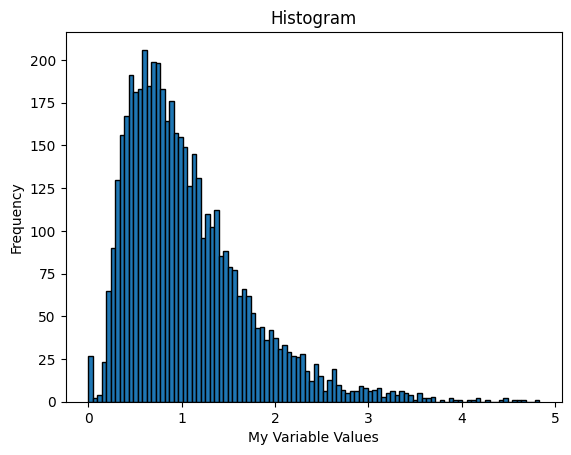

In [29]:
plt.hist(my_variable_view, bins=100, edgecolor='black')

# Adding labels and title
plt.xlabel('My Variable Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Displaying the histogram
plt.show()